**Understanding the dataset**

***Dataset:*** https://www.kaggle.com/gilsousa/habermans-survival-data-set/data

***Problem statement:***

Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
Age of patient at the time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

***Objective:*** To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes


**Importing the required modules**

1. Pandas- Python Data Analysis Library
2. Numpy- Python Package for Scientific Computing
3. matplotlib- Python Plotting Library
4. seaborn- Python Statistical Data Visualization Library


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from statsmodels import robust
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Uploading the dataset to google colab** 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


**Loading the dataset:**  The Haberman's Surival Dataset is a comma seperated file (csv). The ***read_csv()*** function from pandas is used to read the csv file(haberman.csv) into dataframe named Habermans_Surival_Data. 

In [ ]:
Habermans_Surival_Data= pd.read_csv(io.StringIO(uploaded['haberman.csv'].decode('utf-8')))
Habermans_Surival_Data.head(10)

,Age,operation_yr,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [ ]:
print(Habermans_Surival_Data.shape)

(306, 4)


In [ ]:
Habermans_Surival_Data["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [ ]:
Habermans_Surival_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   operation_yr     306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


***Observations:***
1. The data set has **no null** values.
2. The csv file contains **306 rows** and **4 columns**. The number of rows indicate the patients who underwent the breast cancer surgery.
3. There are 4 columns in the dataset.
    *   Age - Age of the patient
    *   operation_yr - Year of operation
    *   axil_nodes - Number of positive axilliary nodes detected. The presence of positive axilliary nodes is a major cause of breast cancer.
    *   survival_status - It provides the information about the patient's survival for 5 years or longer.
4. All the columns are of **Integer data** type.    
5. The value_counts() is to check how many points are present for each class.The number of patients **survived is 225** and **died is 81**. So, the data is **imbalanced**. 
6. Memory used by data set is approximately **9.7 KB**



In [ ]:
print (Habermans_Surival_Data.describe())

              Age  operation_yr  axil_nodes  survival_status
count  306.000000    306.000000  306.000000       306.000000
mean    52.457516     62.852941    4.026144         1.264706
std     10.803452      3.249405    7.189654         0.441899
min     30.000000     58.000000    0.000000         1.000000
25%     44.000000     60.000000    0.000000         1.000000
50%     52.000000     63.000000    1.000000         1.000000
75%     60.750000     65.750000    4.000000         2.000000
max     83.000000     69.000000   52.000000         2.000000


***Observations:***

1. **Total** number of patients: **306**
2. The **mean** value for age of patients: **52.4575**
3. The minimum age of patients is observed to be **30 years**.
4. For 25%, we can assume that **25%** of patients have age less than **44 years**.
5. For 50%, we can assume that **50%** of patients have age less than **52 years**.
6. For 75%, we can assume that **75%** of patients have age less than **60 years**.
7. The maximum age of patients is **83 years**.
8. The year of operation is between **1958 to 1969**.



***Survival Status attribute(dependent variable & class variable) contains integer data types that are not categorical type. Hence it is required to convert to categorical type.***




In [ ]:
Habermans_Surival_Data["survival_status"] = Habermans_Surival_Data["survival_status"].map({1:"yes", 2:"no"})
Habermans_Surival_Data.head(15)

,Age,operation_yr,axil_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes
5,33,58,10,yes
6,33,60,0,yes
7,34,59,0,no
8,34,66,9,no
9,34,58,30,yes


***Check for the datapoint based on class***

In [ ]:
print(Habermans_Surival_Data.groupby("survival_status").count())

                 Age  operation_yr  axil_nodes
survival_status                               
no                81            81          81
yes              225           225         225


***Classify data based on the survival_status.***

In [ ]:
Haberman_survived=Habermans_Surival_Data.loc[Habermans_Surival_Data["survival_status"]=="yes"]
Haberman_died=Habermans_Surival_Data.loc[Habermans_Surival_Data["survival_status"]=="no"]

There are different levels of analysis:
1. **Univariate analysis:** This data analysis technique deals with only one variable.
    *   1-D Scatter plot
    *   Probability  Density Function(PDF)
    *   Cummulative Distribution Function(CDF)
    *   Box plot
    *   Violin plot
2. **Bivariate analysis:**
    *  2-D Scatter plot
    *  Pair plot
3. **Multivariate analysis:**
    *  Contour plot

***2-D Scatter plot***

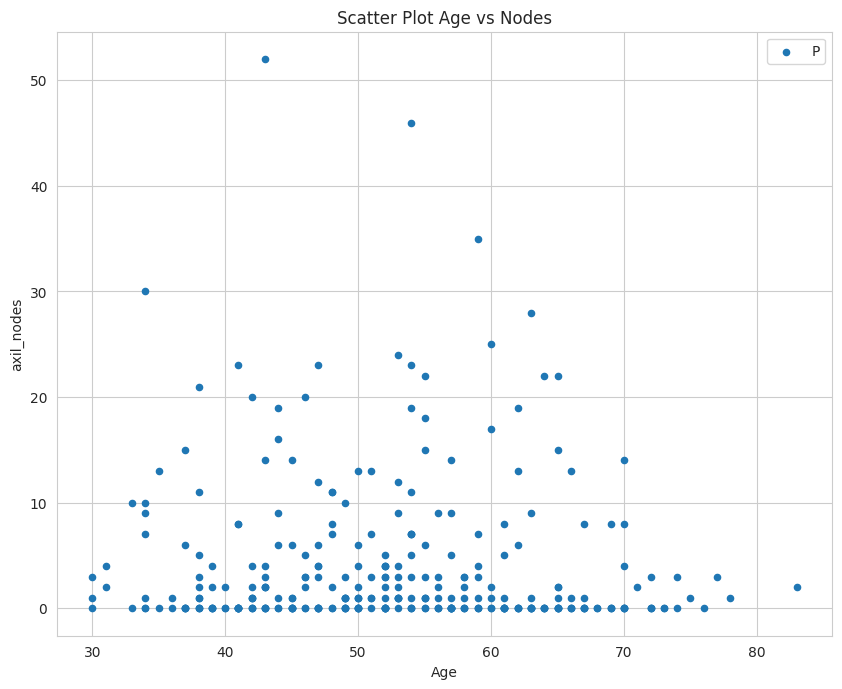

In [88]:
Habermans_Surival_Data.plot(kind='scatter' ,x='Age',y='axil_nodes');
plt.title('Scatter Plot Age vs Nodes')
plt.legend("Points")
plt.show()

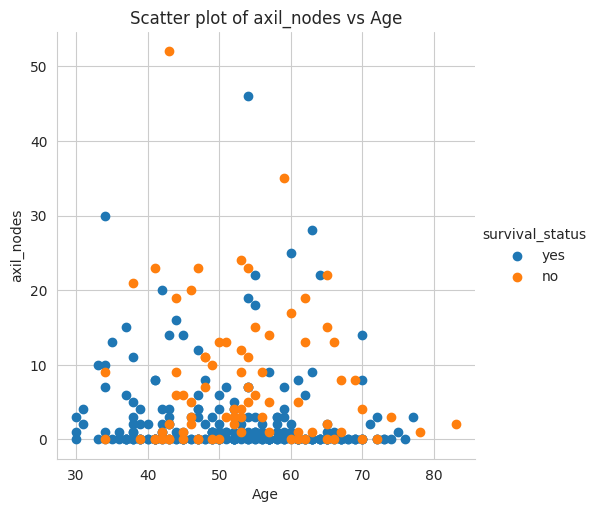

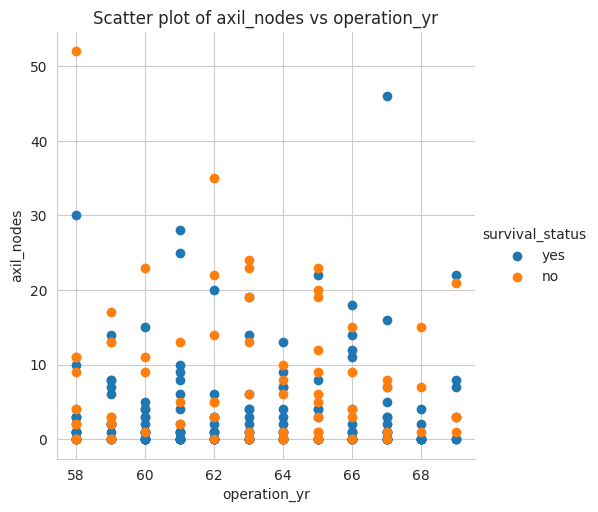

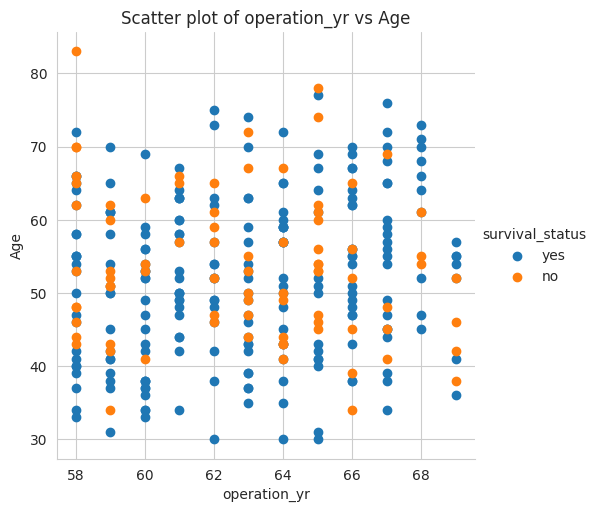

In [120]:
sns.set_style('whitegrid')
sns.FacetGrid(Habermans_Surival_Data, hue="survival_status", height=5) \
   .map(plt.scatter,'Age','axil_nodes') \
   .add_legend();
plt.title("Scatter plot of axil_nodes vs Age")


sns.set_style('whitegrid')
sns.FacetGrid(Habermans_Surival_Data, hue="survival_status", height=5) \
   .map(plt.scatter,'operation_yr','axil_nodes') \
   .add_legend();
plt.title("Scatter plot of axil_nodes vs operation_yr")

sns.set_style('whitegrid')
sns.FacetGrid(Habermans_Surival_Data, hue="survival_status", height=5) \
   .map(plt.scatter,'operation_yr','Age') \
   .add_legend();
plt.title("Scatter plot of operation_yr vs Age")
plt.show()


**Observations:**
1. The patient's whose age range is from **30-40** have survived breast cancer. (As there are more number of blue dots.)
2. There are very few patients who have positive axilliary nodes from **20** to **30**.
3. The patients whose age range is from **50-60 have survived ** given the condition where there are **no positive axilliary nodes**. (As there more number of blue dots)
4. All the patients who have **age above 80 have died**. There are no blue dots here.
5. Few patients who have **axilliary nodes above 10 have survived.**( As the blue dots are more than 10)

***Pair Plot***

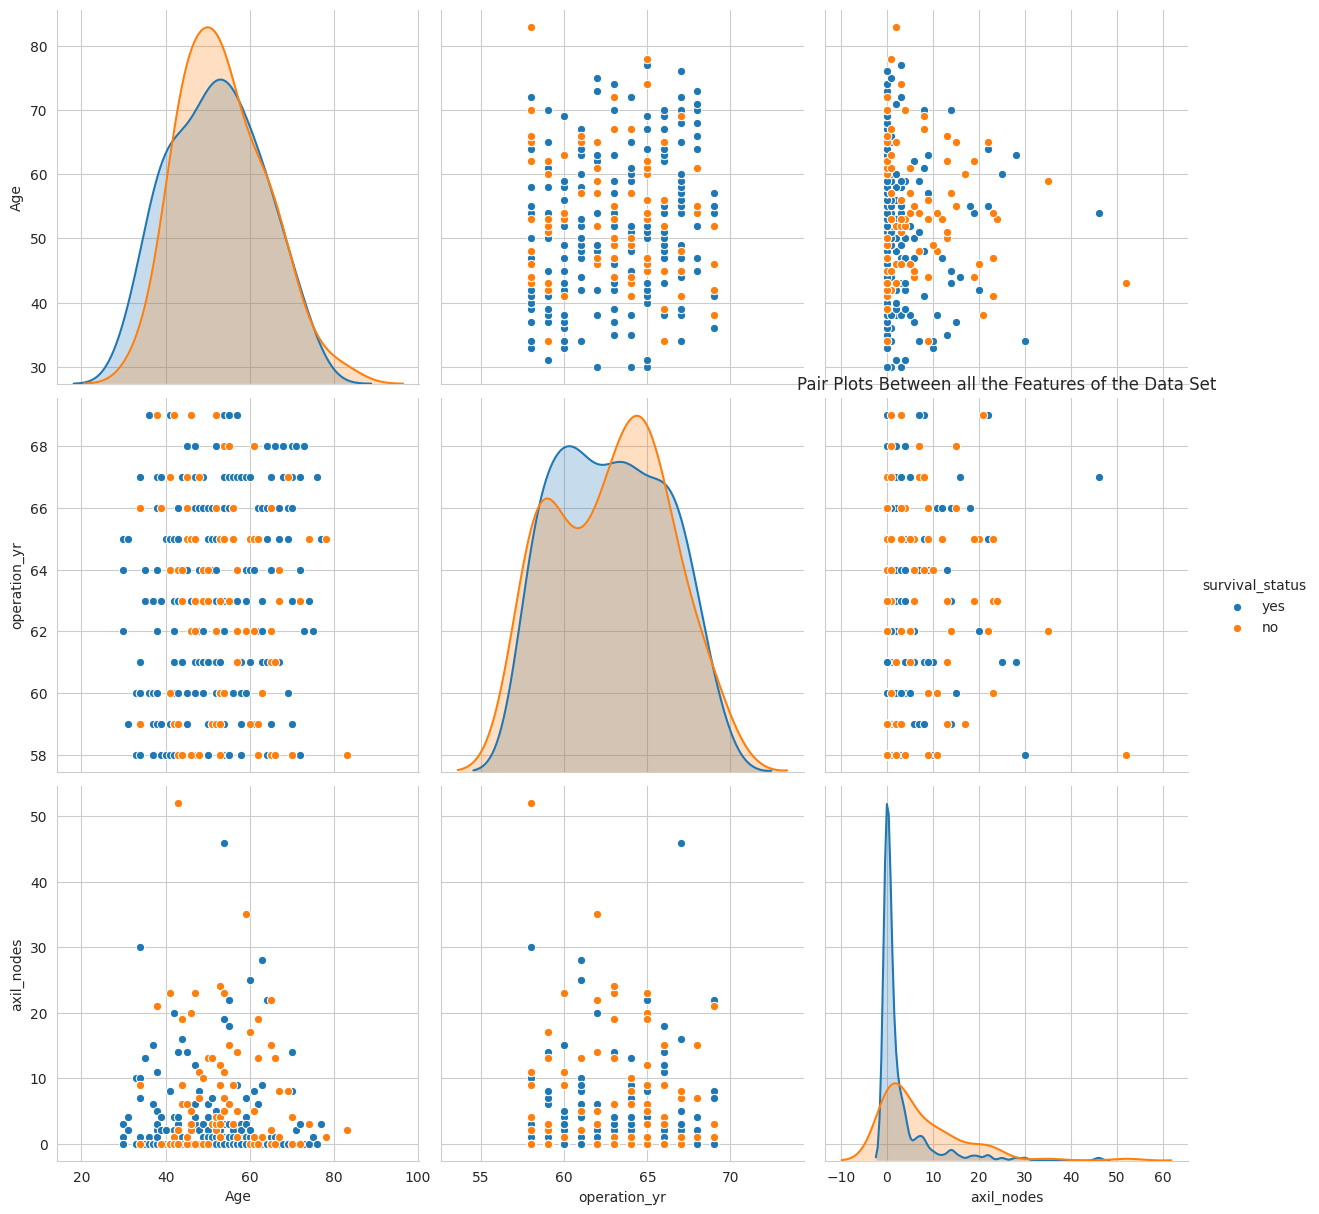

In [93]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(Habermans_Surival_Data,hue="survival_status",height=4)
plt.title('Pair Plots Between all the Features of the Data Set')
plt.show()

**Observations:**
1. The data is **not linearly seperated**.
2. There is **data overlapping** in all the plots.
3. In plot 2, the **operation_yr on X-axis** and **Age on Y-axis**, there is a lot of data overlapping. So, we cannot make a classification based on it. But we can observe that, In the **year 1961 and 1968 have very few deaths** compared to other years.(As there are very less orange dots)
4. In plot 3, **axil_nodes on X-axis** and **Age on Y-axis**. Even though there is a lot of data overlapping, we can observe that there are some **distinguishable patterns**. So, **axil_nodes** and **Age** are the **most useful** features to identify the **survival_status** of a patient.
5. In Plot 6, **axil_nodes is on X-axis** and **operation_yr on Y-axis**. Most of the points are overlapped. Hence, we cannot derive any conclusions.
5. **Plot 4** is a **mirror image** of **Plot 2.** **Plot 7** is a **mirror image** of **Plot 3**.**Plot 8** is a **mirror image** of **plot 6**.
6. **Plot 7** and **Plot 3 are the best plots** to consider for data analysis.


***1-D scatter plots***

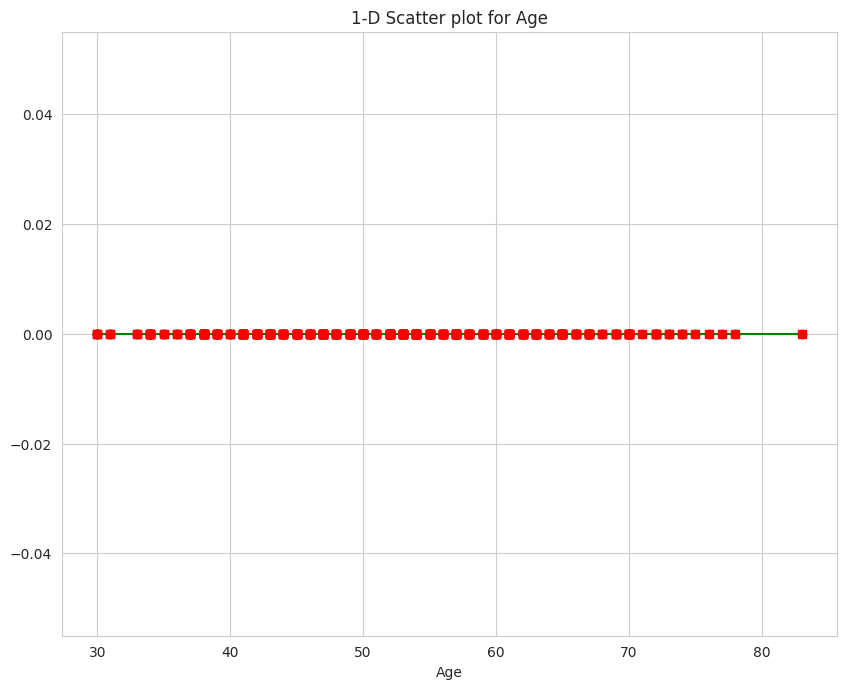

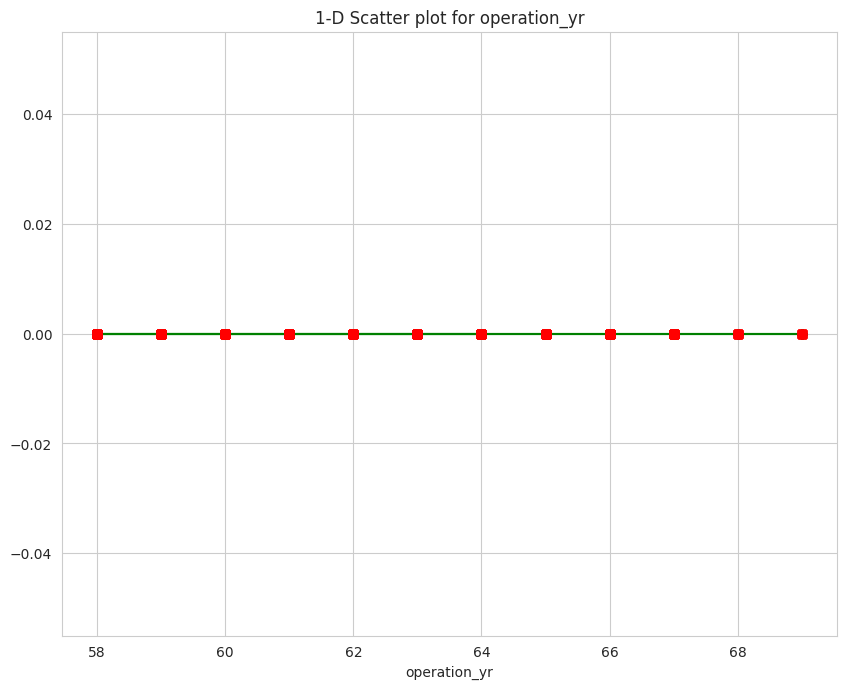

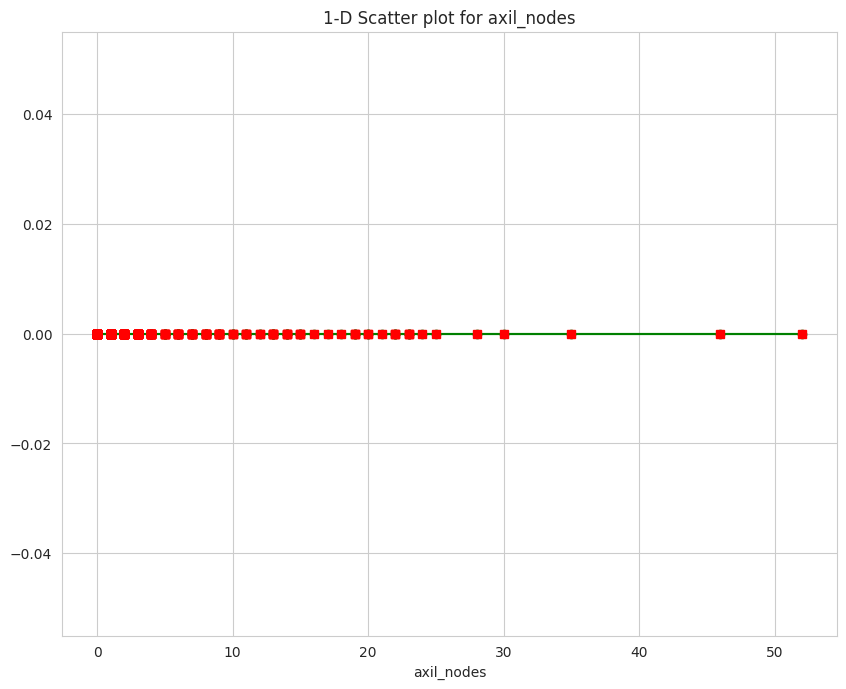

In [61]:
#1-D scatter plot of Age
plt.xlabel('Age')
plt.plot(Habermans_Surival_Data["Age"], np.zeros_like(Habermans_Surival_Data['Age']), 'go-')
plt.plot(Habermans_Surival_Data["Age"], np.zeros_like(Habermans_Surival_Data['Age']), 'rs')
plt.title("1-D Scatter plot for Age")
plt.show()

#1-D scatter plot of operation_year
plt.xlabel('operation_yr')
plt.plot(Habermans_Surival_Data["operation_yr"], np.zeros_like(Habermans_Surival_Data['operation_yr']), 'go-')
plt.plot(Habermans_Surival_Data["operation_yr"], np.zeros_like(Habermans_Surival_Data['operation_yr']), 'rs')
plt.title('1-D Scatter plot for operation_yr')
plt.show()

#1-D scatter plot of axil_nodes
plt.xlabel('axil_nodes')
plt.plot(Habermans_Surival_Data["axil_nodes"], np.zeros_like(Habermans_Surival_Data['axil_nodes']), 'go-')
plt.plot(Habermans_Surival_Data["axil_nodes"], np.zeros_like(Habermans_Surival_Data['axil_nodes']), 'rs')
plt.title('1-D Scatter plot for axil_nodes')
plt.show()

**Observations:**
1. 1-D Scatter plots are based on **one feature** like Age, operation_yr and axil_nodes.
2. There is a **huge amount of overlapping** that we can observe from the above plots. So, we cannot draw any conclusions.

**Histogram:**

Bin Edges:  [ 0.    2.08  4.16  6.24  8.32 10.4  12.48 14.56 16.64 18.72 20.8  22.88
 24.96 27.04 29.12 31.2  33.28 35.36 37.44 39.52 41.6  43.68 45.76 47.84
 49.92 52.  ]
----------------------------------------------------------------------------------------------------
counts per bin:  [197  33  13  14   9   6   9   4   2   5   4   4   1   1   1   0   1   0
   0   0   0   0   1   0   1]


Text(0.5, 1.0, 'Histogram')

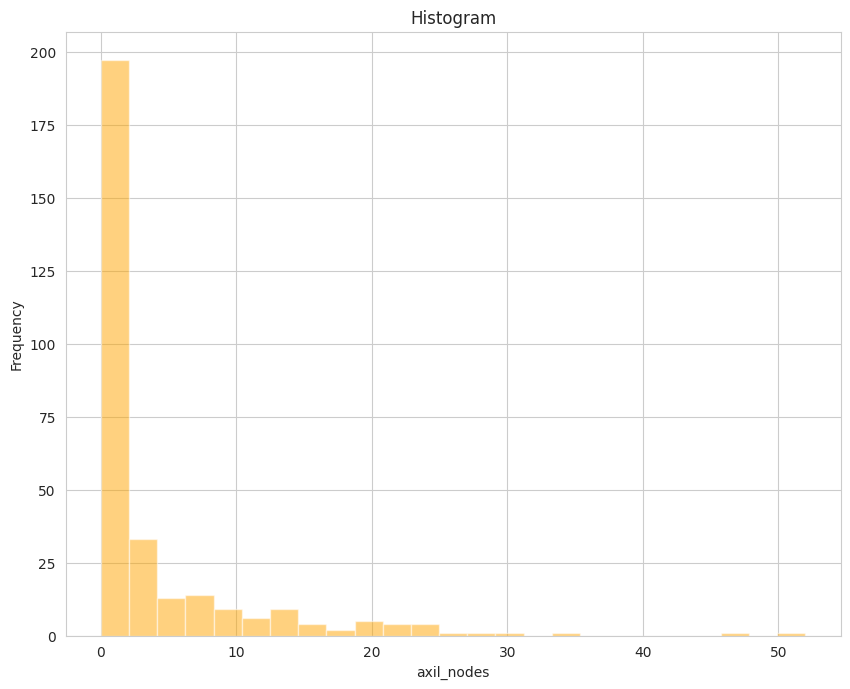

In [94]:
df_nodes = Habermans_Surival_Data['axil_nodes']
count,bin_edges = np.histogram(df_nodes,bins=25)
print("Bin Edges: ",bin_edges)
print("-"*100)
print("counts per bin: ", count)
plt.hist(df_nodes,bins=25,color="orange",alpha=0.5)
plt.xlabel("axil_nodes")
plt.ylabel("Frequency")
plt.title("Histogram")

**Observations:** There are **197 patients** out of **306 patients** who have **axil_nodes less than 2.08**.  So, most of the patients have small number of axil_nodes.

***PDF distribution:***  PDF is a smoother  version of Histogram. The bars represent the histograms and the curves represent the PDFs.

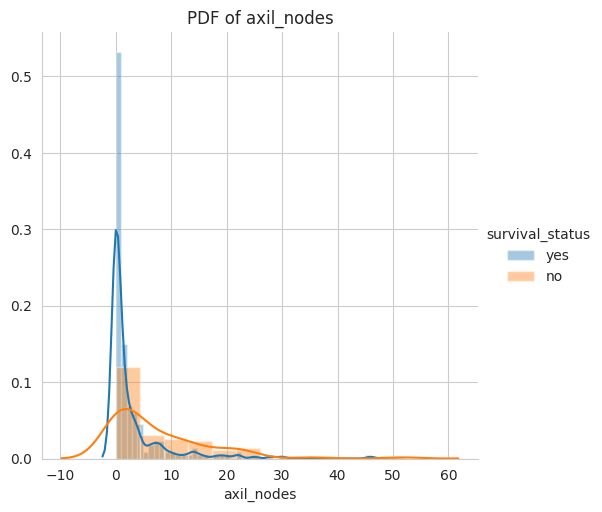

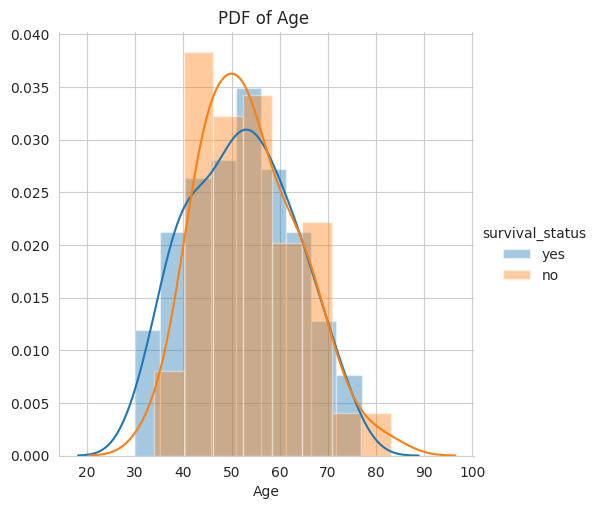

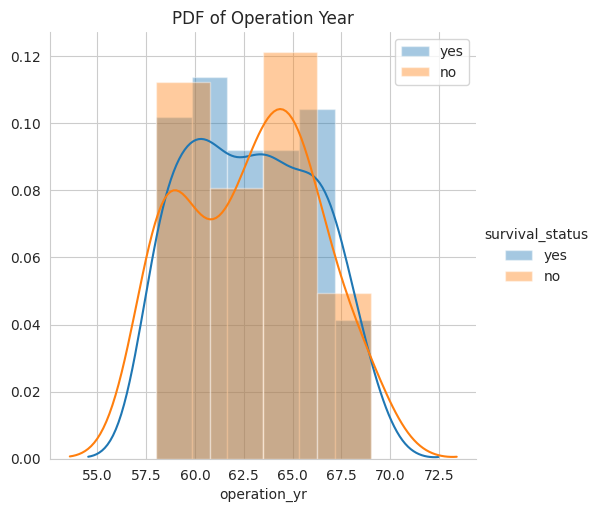

In [101]:
#PDF distribution for all columns w.r.t survival_status
sns.FacetGrid(Habermans_Surival_Data,hue="survival_status",height=5).map(sns.distplot,"axil_nodes").add_legend()
plt.title('PDF of axil_nodes')
sns.FacetGrid(Habermans_Surival_Data,hue="survival_status",height=5).map(sns.distplot,"Age").add_legend()
plt.title('PDF of Age ')
sns.FacetGrid(Habermans_Surival_Data,hue="survival_status",height=5).map(sns.distplot,"operation_yr").add_legend()
plt.title('PDF of Operation Year')
plt.legend()

1. **PDF based on Age:**
    *   There is a **huge data overlapping** that we can see in the plot.
    *   Patients whose **Age** is in the range of **30-40** have **survived the most** compared to other groups.
    *   Patients whose **Age** is in the **range of 40-60** have **fewer prospects of survival**.
    *   Patients whose **Age** is in the **range of 40-45** recorded the **highest number of deaths**.
2. **PDF  based on  operation_yr:**
    *   We can observe that there is  **major overlapping**.
    *   The success of operation cannot just be based on **operation_yr** as a factor.
    *   There are huge number of **unsuccessful operations** in the year of **1965** and in the year of **1960**.
    *   There are huge number of **successful operations** in the year of **1961**.
3. **PDF based on  axil_nodes:**
    *   The patients with **zero axil_nodes** have **highest survival rate**.
    *   Patients with **one axil_nodes** also have **good survival rate**.
    *   **axil_nodes** is a attribute which can be used for data analysis.

***Cummulative Distribution Function(CDF)***


PDF of patients survived 5 years or longer: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin Edges:  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
----------------------------------------------------------------------------------------------------
PDF of patients died within 5 years: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin Edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
----------------------------------------------------------------------------------------------------


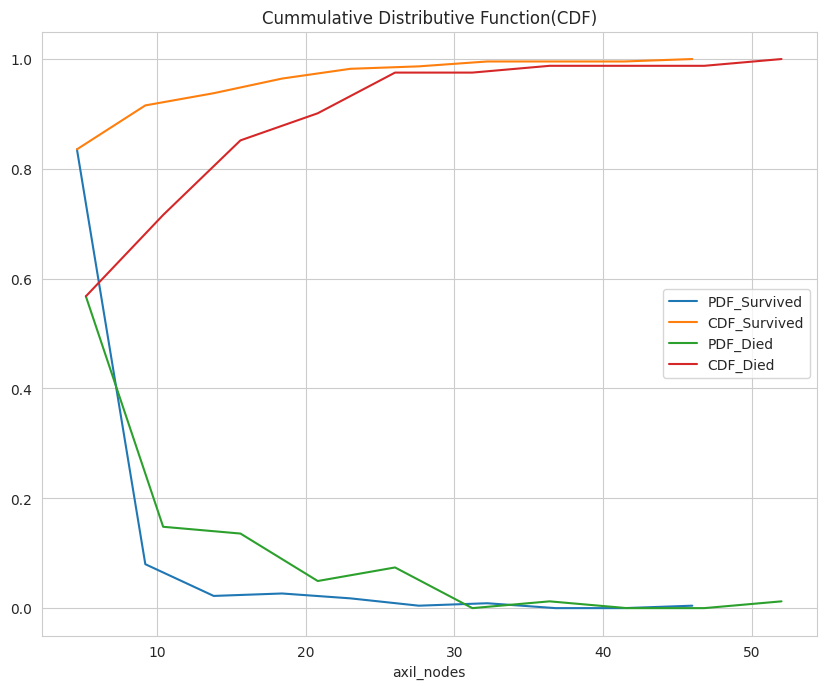

In [81]:
counts1, bin_edges1 = np.histogram(Haberman_survived['axil_nodes'],bins=10,density=True)
pdf1 = counts1/(sum(counts1))
print('PDF of patients survived 5 years or longer:', pdf1)
print('Bin Edges: ', bin_edges1)
print("-" * 100)
cdf1 = np.cumsum(pdf1)
counts2, bin_edges2 = np.histogram(Haberman_died['axil_nodes'],bins=10,density=True)
pdf2 = counts2/(sum(counts2))
print('PDF of patients died within 5 years:', pdf2)
print('Bin Edges: ', bin_edges2)
cdf2 = np.cumsum(pdf2)
print("-" * 100)
PDF_Survived, = plt.plot(bin_edges1[1:],pdf1,label='PDF_Survived')
CDF_Survived, = plt.plot(bin_edges1[1:], cdf1, label='CDF_Survived')
PDF_Died, = plt.plot(bin_edges2[1:], pdf2, label='PDF_Died')
CDF_Died, = plt.plot(bin_edges2[1:], cdf2, label='CDF_Died')
plt.legend(handles=[PDF_Survived, CDF_Survived, PDF_Died, CDF_Died])
plt.xlabel('axil_nodes')
plt.title("Cummulative Distributive Function(CDF)")
plt.show()

**Observations:**

1. Some of the patients with higher number of axil_nodes also survived.
2. The **highest number of axil_nodes** is **46** who have survived.
3. The **percentage of patients** with **axil_nodes** ranging from **0 to 4.6** who have survived is **83.5%**
4.  The **percentage of patients** with **axil_nodes** ranging from **0 to 5.2** who have died is **56.7%**

**Mean,Variance,Std-deviation**

In [ ]:
#Mean, Std-deviation of age

print("Mean of Haberman_survived: ",np.mean(Haberman_survived["Age"]))
print("Mean of Haberman_died: ",np.mean(Haberman_died["Age"]))

print("\nStd-dev of Haberman_survived: ", np.std(Haberman_survived["Age"]))
print("Std-dev of Haberman_died: ",np.std(Haberman_died["Age"]))

print("\nMean of Haberman_survived: ",np.mean(Haberman_survived["operation_yr"]))
print("Mean of Haberman_died: ",np.mean(Haberman_died["operation_yr"]))

print("\nStd-dev of Haberman_survived: ", np.std(Haberman_survived["operation_yr"]))
print("Std-dev of Haberman_died: ",np.std(Haberman_died["operation_yr"]))

print("\nMean of Haberman_survived: ",np.mean(Haberman_survived["axil_nodes"]))
print("Mean of Haberman_died: ",np.mean(Haberman_died["axil_nodes"]))

print("\nStd-dev of Haberman_survived: ", np.std(Haberman_survived["axil_nodes"]))
print("Std-dev of Haberman_died: ",np.std(Haberman_died["axil_nodes"]))


Mean of Haberman_survived:  52.01777777777778
Mean of Haberman_died:  53.67901234567901

Std-dev of Haberman_survived:  10.98765547510051
Std-dev of Haberman_died:  10.10418219303131

Mean of Haberman_survived:  62.86222222222222
Mean of Haberman_died:  62.82716049382716

Std-dev of Haberman_survived:  3.2157452144021956
Std-dev of Haberman_died:  3.3214236255207883

Mean of Haberman_survived:  2.7911111111111113
Mean of Haberman_died:  7.45679012345679

Std-dev of Haberman_survived:  5.857258449412131
Std-dev of Haberman_died:  9.128776076761632


***Median, Percentile,Quantile, IQR,MAD***

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("Median of Haberman survived: ", np.median(Haberman_survived["axil_nodes"]))
print("Median of Haberman survived: ", np.median(Haberman_died["axil_nodes"]))

print("Quantiles of Haberman survived: ", np.percentile(Haberman_survived["axil_nodes"],np.arange(0, 100, 25)))
print("Quantiles of Haberman survived: ", np.percentile(Haberman_died["axil_nodes"],np.arange(0, 100, 25)))

print("90th Percentile of Haberman survived: ", np.percentile(Haberman_survived["axil_nodes"],90))
print("90th Percentile of Haberman survived: ", np.percentile(Haberman_died["axil_nodes"],90))

print("Median Absolute Deviation of Haberman survived: ", robust.mad(Haberman_survived["axil_nodes"]))
print("Median Absolute Deviation of Haberman survived: ", robust.mad(Haberman_died["axil_nodes"]))


Medians:
Median of Haberman survived:  0.0
Median of Haberman survived:  4.0

Quantiles:
Quantiles of Haberman survived:  [0. 0. 0. 3.]
Quantiles of Haberman survived:  [ 0.  1.  4. 11.]

90th Percentiles:
90th Percentile of Haberman survived:  8.0
90th Percentile of Haberman survived:  20.0

Median Absolute Deviation
Median Absolute Deviation of Haberman survived:  0.0
Median Absolute Deviation of Haberman survived:  5.930408874022408


***Box plots and whiskers:***
* The box plot is a distribution of data based on five-number summary.
* These five-numbers are as below:
    1. Minimum or Smallest number
    2. First Quantile- Q1 or 25th percentile
    3. Median- Q2 or 50th percentile
    4. Third Quantile- Q3 or 75th percentile
    5. Maximum or largest number-  Q3 + 1.5*IQR
* The box plot is  Univariate analysis.
* The lines extending parallel from the boxes are known as 'whiskers'.
* The outliers are displayed as points outside the box.


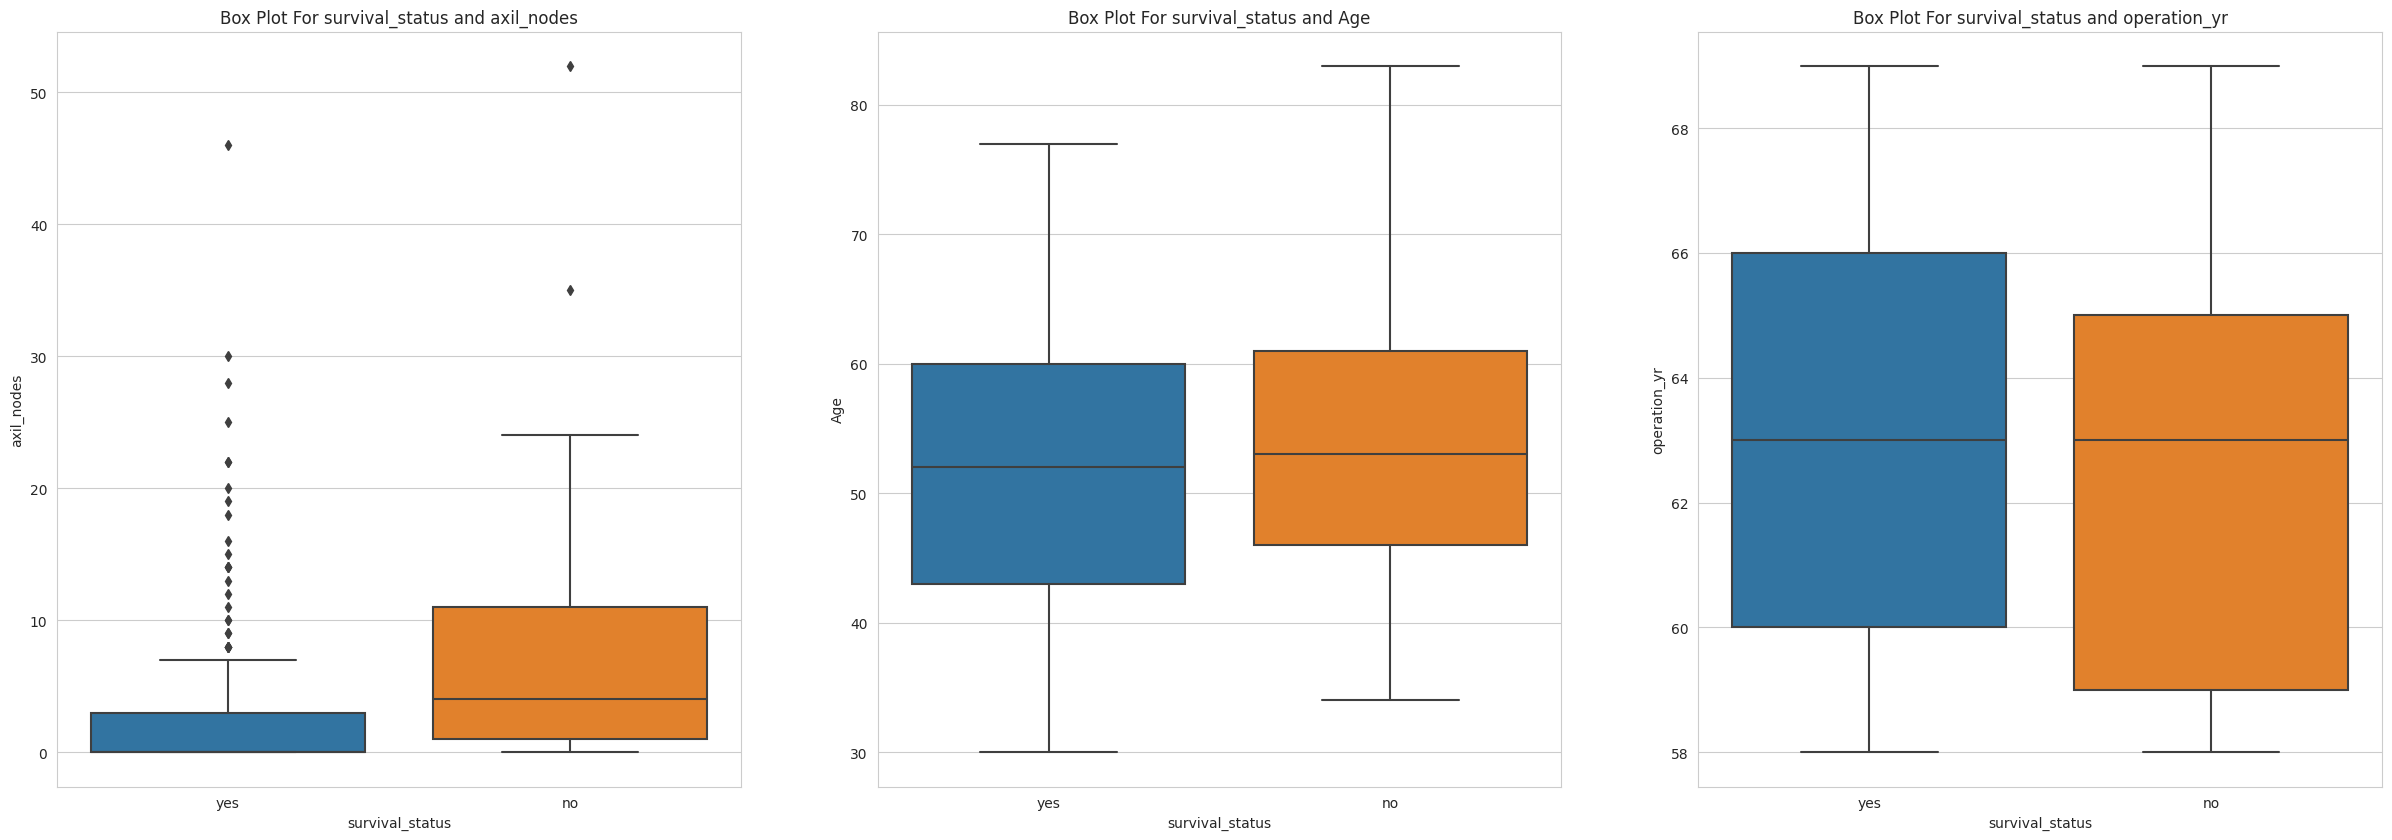

In [122]:
#box plot for all the columns
fig,axes = plt.subplots(1,3,figsize = (30,10))

plt.subplot(131)
sns.boxplot(x="survival_status",y="axil_nodes",data=Habermans_Surival_Data)
plt.title('Box Plot For survival_status and axil_nodes')

plt.subplot(132)
sns.boxplot(x="survival_status",y="Age",data=Habermans_Surival_Data)
plt.title('Box Plot For survival_status and Age')

plt.subplot(133)
sns.boxplot(x="survival_status",y="operation_yr",data=Habermans_Surival_Data)
plt.title('Box Plot For survival_status and operation_yr')

plt.show()

***Violin plots:*** 

*   The violin plots are used to visualize the distribution of data and its probability density.
*   The white dot in the middle represents the median value and the thick black bar represents the InterQuantile Region(IQR).
*   The black extended line represents the minimum and maximum values in the data.
*   The violin plot is also Univariate analysis.



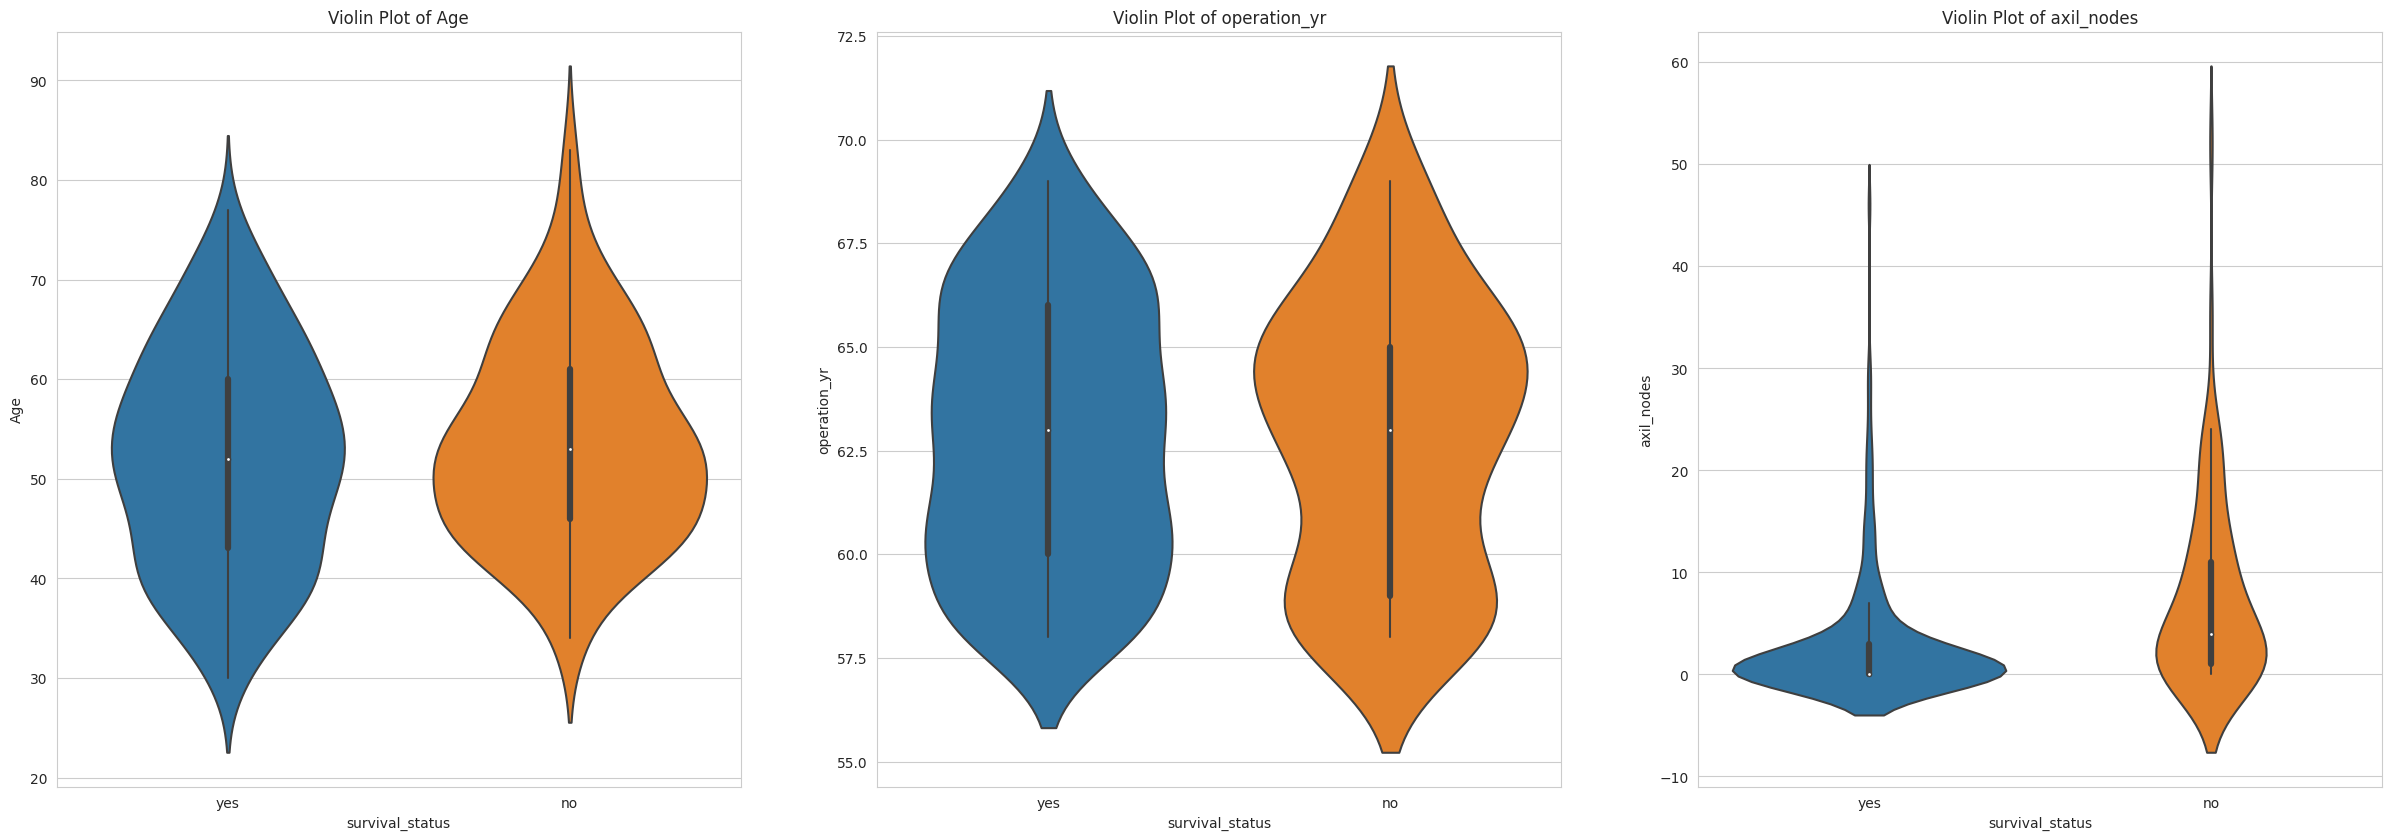

In [118]:
#violin plot for all the columns
fig,axes = plt.subplots(1,3,figsize = (30,10))

plt.subplot(131)
sns.violinplot( x = "survival_status", y ="Age",data =Habermans_Surival_Data )  
plt.title("Violin Plot of Age")

plt.subplot(132)
sns.violinplot( x = "survival_status", y ="operation_yr",data =Habermans_Surival_Data ) 
plt.title("Violin Plot of operation_yr")


plt.subplot(133)
sns.violinplot( x = "survival_status", y ="axil_nodes",data =Habermans_Surival_Data ) 
plt.title("Violin Plot of axil_nodes")

plt.show()

**Observations from Box plot and Violin Plots:**

1. IQR is a measure of the bulk of the value lies. Hence, the patients who **survived** have **axil_nodes of less than 3**. Similarly, patients who have **died** have the **axil_nodes greater than 2**.
2. The **number of outliers** in the Survived category is **higher** than the Died category.
3. We can also observe that, the Q1 and median of the survived category are almost same. The median of the died category and Q3 of survived category are also same. So, we cannot conclude the patient's survival status as there could be a some **amount of error** in the data because of **overlapping**.
4. There are huge number of patients who have **zero axil_nodes** have **survived**. Also, there are subsequent number of patients who have higher number of axil_nodes have died.
5. Also, we can observe that, there are people who **survived** with **higher number of axil_nodes** and there are people who have **died** with **lower number of axil_nodes.**


***Multivariate Probability Density***

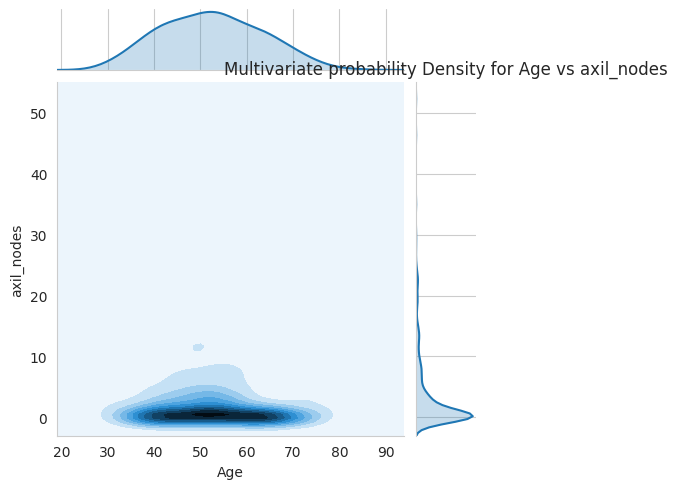

In [125]:
#contour plot
sns.jointplot(x="Age", y="axil_nodes", data=Habermans_Surival_Data, kind="kde",height=5);
plt.title("Multivariate probability Density for Age vs axil_nodes")
plt.show();

***Observations:***
The patients whose **axil_nodes** range is **less than or equal to 2** have the **Age** in range **50 to 56**.

***Conclusion:***

1. The majority of patients whose **age** is in the range of **30 to 40** have **survived** from breast cancer.
2. The Patients who had undergone the surgery between the years **1961 to 1968** have **survived for 5 years or longer**.
3. Patients with zero axil_nodes have high chances of survival compared to other patients.
4. Also, few patients with **higher axil_nodes** have **survived** and few patients with **lower axil_nodes** have **died**. So, we cannot draw final conclusions based on axil_nodes.
5. There are very few number of patients who have **axil_nodes more than 25** have **survived**.

In [1]:
!jupyter nbconvert --to html Exploratory_Data_Analysis_on_Haberman_Dataset.ipynb

[NbConvertApp] Converting notebook Exploratory_Data_Analysis_on_Haberman_Dataset.ipynb to html
[NbConvertApp] Writing 1383971 bytes to Exploratory_Data_Analysis_on_Haberman_Dataset.html
